In [1]:
import sys
sys.path.append('../figures/')

import arviz as az
import jax.numpy as jnp
import matplotlib.pylab as plt
import numpy as np
import numpyro.distributions as dist
from scipy.special import erf

from astropy.cosmology import Planck15
import astropy.units as u
from makeCorner import *

az.rcParams["plot.max_subplots"] = 80
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

logit_std = 2.5
tmp_max = 100.
tmp_min = 2.

In [4]:
cdf_file = "./RUNS/CBC_O3_Power_Law.cdf"
data = az.from_netcdf(cdf_file)
samps = data.posterior.stack(draws=("chain", "draw"))

In [5]:
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "delta_alpha":dist.Normal(0,1),
    "width_alpha":dist.Uniform(-1,1),
    "middle_z_alpha":dist.Uniform(0,4),
    "mu_m1":dist.Uniform(20,50),
    "mMin":dist.Uniform(5,15),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "beta_z":dist.Uniform(0,10),
    "zp": dist.Uniform(0,4),
    "fpeak": dist.Uniform(-5,0),
    "high_f_peak": dist.Uniform(-5,0),
    "width_f_peak": dist.Uniform(-1,1),
    "middle_z_f_peak": dist.Uniform(0,4),
    "sig_m1": dist.Uniform(1.5,15),
    "mMax":dist.Uniform(50,100),
    "high_mMax":dist.Uniform(50, 100),
    # "delta_mMax":dist.Normal(0,5),
    "width_mMax":dist.Uniform(-1,1),
    "middle_z_mMax":dist.Uniform(0,4),
    "dmMax":dist.Uniform(0.5,1.5),
    "high_dm":dist.Uniform(0.5,1.5),
    "width_dm":dist.Uniform(-1,1),
    "middle_z_dm":dist.Uniform(0,4),    
}

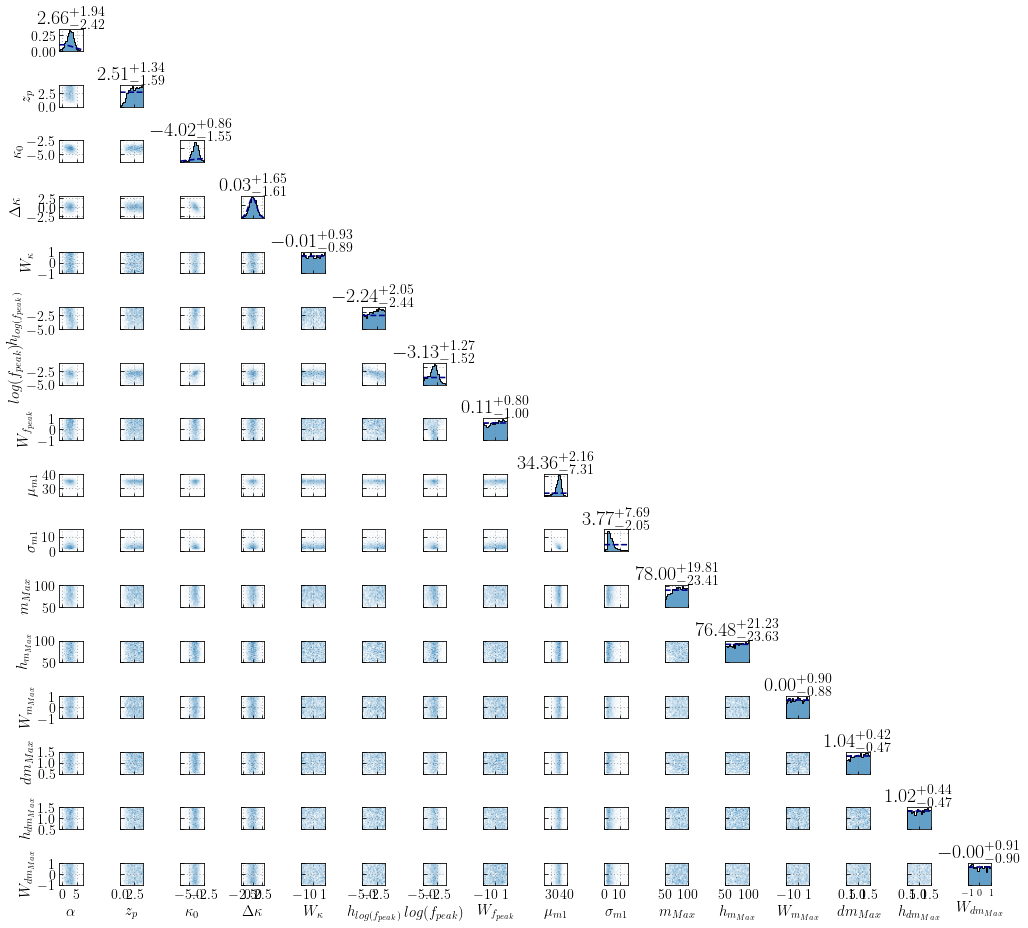

In [6]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data_no_GWB.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-1,7),"label":r"$\alpha$"},
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa_{0}$"},
    "delta_alpha":{"data":stacked_samples_no_GWB.delta_alpha,"plot_bounds":(-3,3),"label":r"$\Delta \kappa$"},
    "width_alpha":{"data":stacked_samples_no_GWB.log_width_alpha,"plot_bounds":(-1,1),"label":r"$W_{\kappa}$"},
    "high_f_peak":{"data":stacked_samples_no_GWB.log_high_f_peak,"plot_bounds":(-5,-1),"label":r"$h_{log(f_{peak})}$"},
    "fpeak":{"data":stacked_samples_no_GWB.log_f_peak,"plot_bounds":(-5,-1),"label":r"$log(f_{peak})$"},
    "width_f_peak":{"data":stacked_samples_no_GWB.log_width_f_peak,"plot_bounds":(-1,1),"label":r"$W_{f_{peak}}$"},
    "mu_m1":{"data":stacked_samples_no_GWB.mu_m1,"plot_bounds":(25,40),"label":r"$\mu_{m1}$"},
    "sig_m1":{"data":stacked_samples_no_GWB.sig_m1,"plot_bounds":(0,15),"label":r"$\sigma_{m1}$"},
    "mMax":{"data":stacked_samples_no_GWB.mMax,"plot_bounds":(50,100),"label":r"$m_{Max}$"},
    "high_mMax":{"data":stacked_samples_no_GWB.high_mMax,"plot_bounds":(50,100),"label":r"$h_{m_{Max}}$"},
    "width_mMax":{"data":stacked_samples_no_GWB.log_width_mMax,"plot_bounds":(-1,1),"label":r"$W_{m_{Max}}$"},
    "dmMax":{"data":stacked_samples_no_GWB.log_dmMax,"plot_bounds":(0.5,1.5),"label":r"$dm_{Max}$"},
    "high_dm":{"data":stacked_samples_no_GWB.log_high_dmMax,"plot_bounds":(0.5,1.5),"label":r"$h_{dm_{Max}}$"},
    "width_dm":{"data":stacked_samples_no_GWB.log_width_dm,"plot_bounds":(-1,1),"label":r"$W_{dm_{Max}}$"},
}


plot_corner(fig,toPlot_no_GWB, '#1f78b4',labelsize=15, priors = new_priors)
plt.savefig("HDPosterior_together_all.png", dpi=500, bbox_inches='tight')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

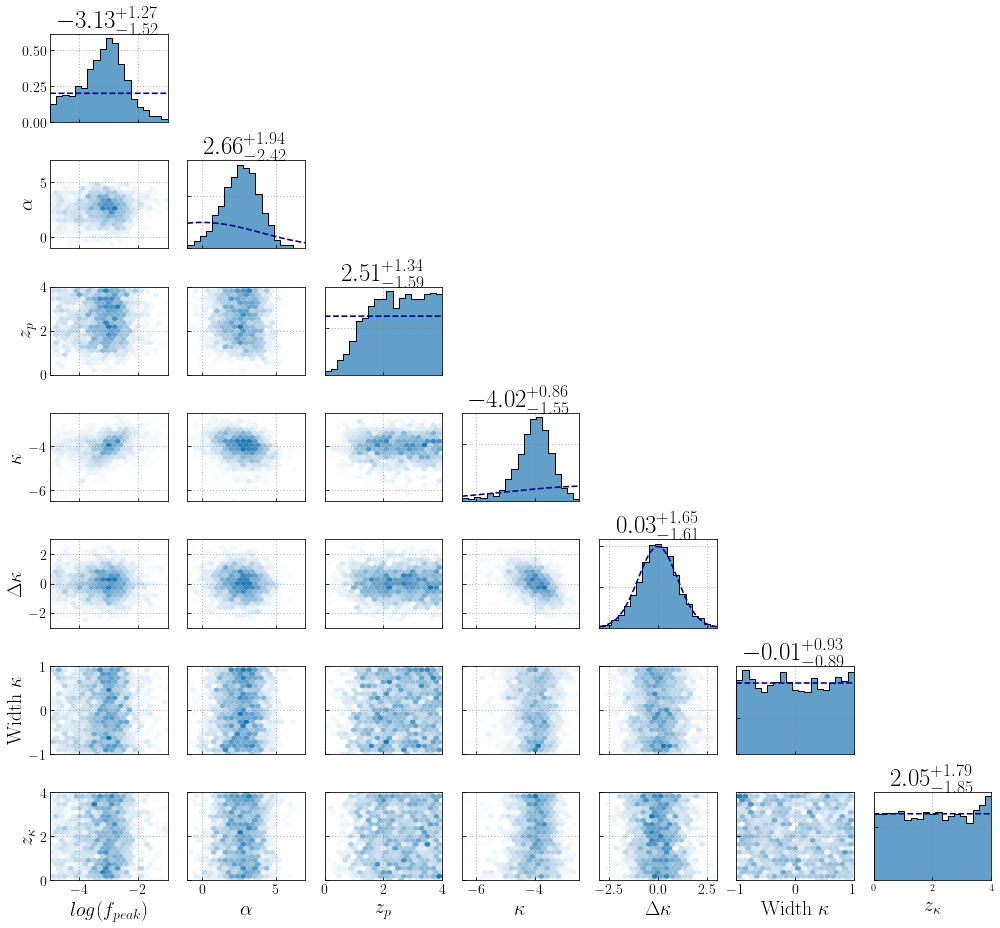

In [7]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data_no_GWB.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB_alpha = {
    "fpeak":{"data":stacked_samples_no_GWB.log_f_peak,"plot_bounds":(-5,-1),"label":r"$log(f_{peak})$"},
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-1,7),"label":r"$\alpha$"},
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa$"},
    "delta_alpha":{"data":stacked_samples_no_GWB.delta_alpha,"plot_bounds":(-3,3),"label":r"$\Delta \kappa$"},
    "width_alpha":{"data":stacked_samples_no_GWB.log_width_alpha,"plot_bounds":(-1,1),"label":r"Width $\kappa$"},
    "middle_z_alpha":{"data":stacked_samples_no_GWB.middle_z_alpha,"plot_bounds":(0,4),"label":r"$z_{\kappa}$"},
}

plot_corner(fig, toPlot_no_GWB_alpha,"#1f78b4",labelsize=20, priors = new_priors)
# plt.savefig("PE_O3_CBC+GWB_all_parameters.png", dpi=400, bbox_inches='tight')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

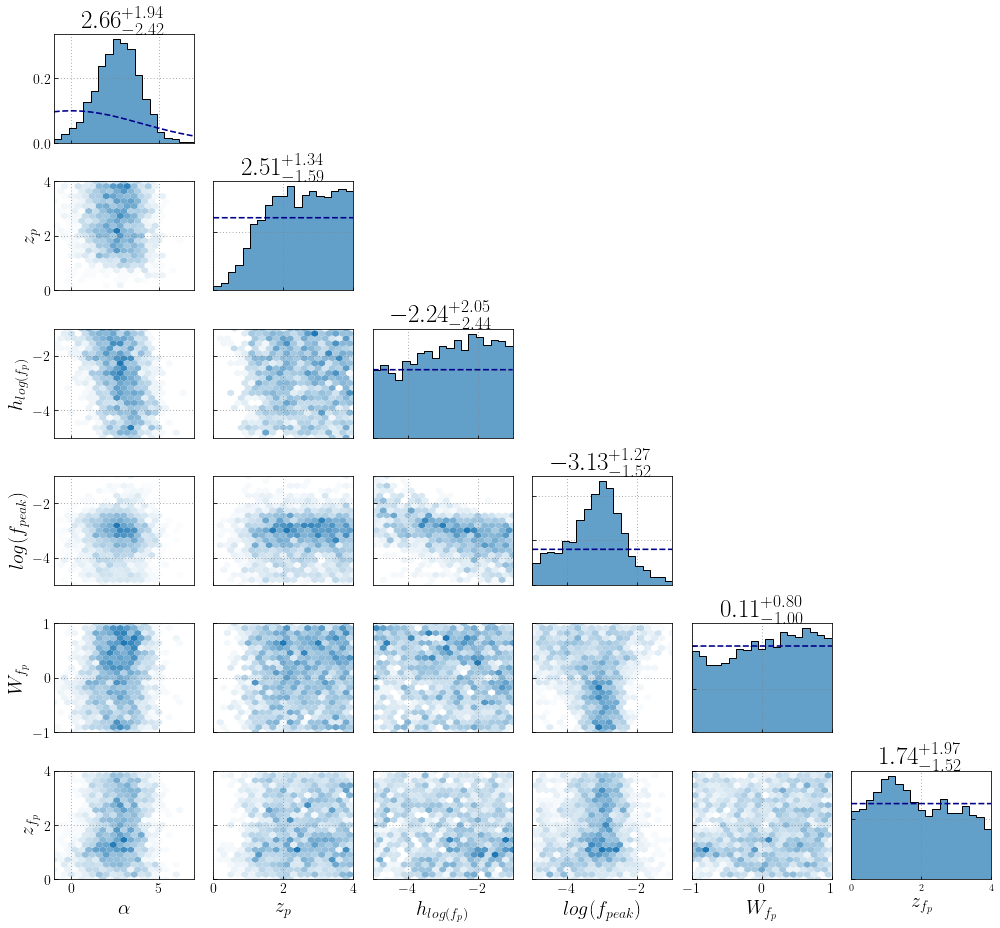

In [35]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data_no_GWB.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB_f_peak = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-1,7),"label":r"$\alpha$"},
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "high_f_peak":{"data":stacked_samples_no_GWB.log_high_f_peak,"plot_bounds":(-5,-1),"label":r"$h_{log(f_{p})}$"},
    "fpeak":{"data":stacked_samples_no_GWB.log_f_peak,"plot_bounds":(-5,-1),"label":r"$log(f_{peak})$"},
    "width_f_peak":{"data":stacked_samples_no_GWB.log_width_f_peak,"plot_bounds":(-1,1),"label":r"$W_{f_p}$"},
    "middle_z_f_peak":{"data":stacked_samples_no_GWB.middle_z_f_peak,"plot_bounds":(0,4),"label":r"$z_{f_p}$"},
}

plot_corner(fig, toPlot_no_GWB_f_peak,"#1f78b4",labelsize=20, priors = new_priors)
# plt.savefig("PE_O3_CBC+GWB_all_parameters.png", dpi=400, bbox_inches='tight')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

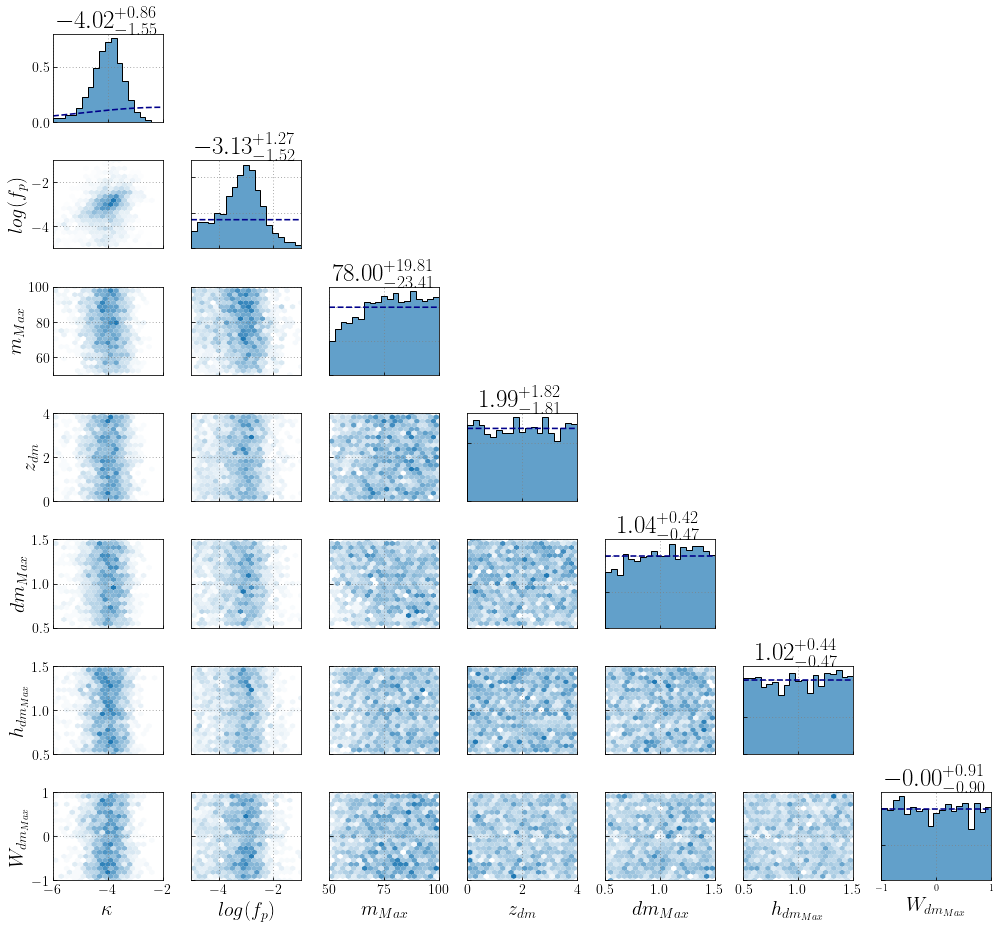

In [9]:
fig = plt.figure(figsize=(14,13))

stacked_samples_no_GWB = data_no_GWB.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB_dm = {
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-6,-2),"label":r"$\kappa$"},
    "fpeak":{"data":stacked_samples_no_GWB.log_f_peak,"plot_bounds":(-5,-1),"label":r"$log(f_{p})$"},
    "mMax":{"data":stacked_samples_no_GWB.mMax,"plot_bounds":(50,100),"label":r"$m_{Max}$"},
    "middle_z_dm":{"data":stacked_samples_no_GWB.middle_z_dm,"plot_bounds":(0,4),"label":r"$z_{dm}$"},
    "dmMax":{"data":stacked_samples_no_GWB.log_dmMax,"plot_bounds":(0.5,1.5),"label":r"$dm_{Max}$"},
    "high_dm":{"data":stacked_samples_no_GWB.log_high_dmMax,"plot_bounds":(0.5,1.5),"label":r"$h_{dm_{Max}}$"},
    "width_dm":{"data":stacked_samples_no_GWB.log_width_dm,"plot_bounds":(-1,1),"label":r"$W_{dm_{Max}}$"},
}

plot_corner(fig, toPlot_no_GWB_dm, "#1f78b4",labelsize=20, priors = new_priors)
plt.savefig("PE_O3_CBC+GWB_all_parameters.png", dpi=400, bbox_inches='tight')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

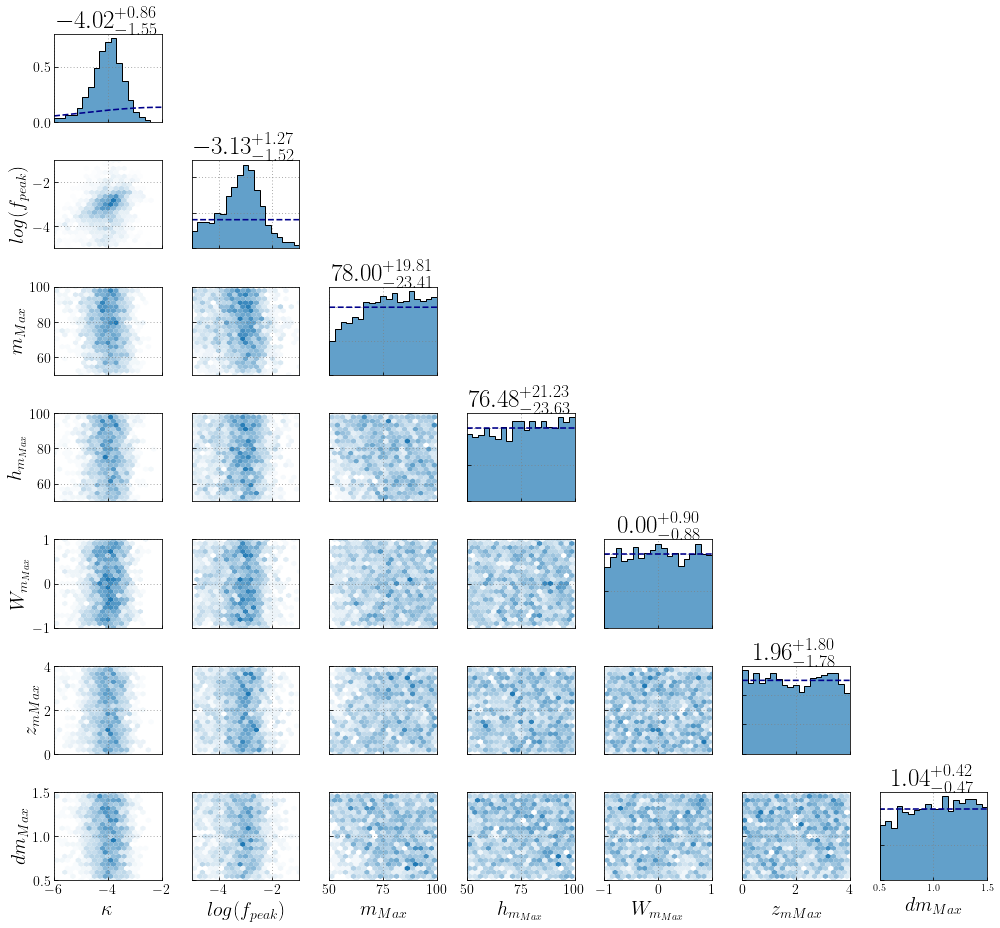

In [10]:
fig = plt.figure(figsize=(14,13))

stacked_samples_no_GWB = data_no_GWB.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB_mMAx = {
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-6,-2),"label":r"$\kappa$"},
    "fpeak":{"data":stacked_samples_no_GWB.log_f_peak,"plot_bounds":(-5,-1),"label":r"$log(f_{peak})$"},
    "mMax":{"data":stacked_samples_no_GWB.mMax,"plot_bounds":(50,100),"label":r"$m_{Max}$"},
    "high_mMax":{"data":stacked_samples_no_GWB.high_mMax,"plot_bounds":(50,100),"label":r"$h_{m_{Max}}$"},
    "width_mMax":{"data":stacked_samples_no_GWB.log_width_mMax,"plot_bounds":(-1,1),"label":r"$W_{m_{Max}}$"},
    "middle_z_mMax":{"data":stacked_samples_no_GWB.middle_z_mMax,"plot_bounds":(0,4),"label":r"$z_{mMax}$"},
    "dmMax":{"data":stacked_samples_no_GWB.log_dmMax,"plot_bounds":(0.5,1.5),"label":r"$dm_{Max}$"},
}

plot_corner(fig, toPlot_no_GWB_mMAx, "#1f78b4",labelsize=20, priors = new_priors)
plt.savefig("PE_O3_CBC+GWB_all_parameters.png", dpi=400, bbox_inches='tight')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [11]:
def sigmoid(low, delta, width, middle, zs):
    return delta / (1 + jnp.exp(-(1/width)*(zs - middle))) + low

In [12]:
def sigmoid_no_delta(low, high, width, middle, zs):
    return (high - low) / (1 + jnp.exp(-(1/width)*(zs - middle))) + low

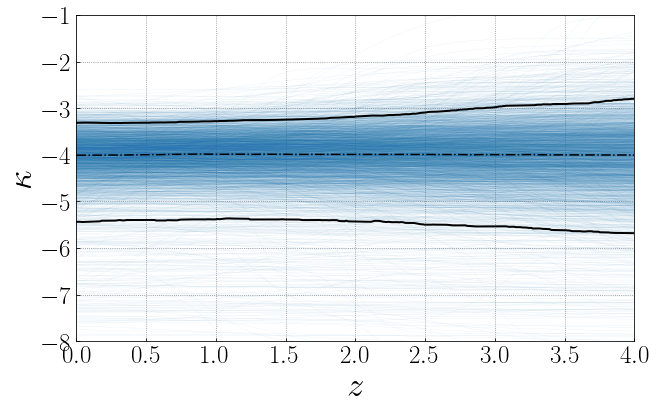

In [13]:
zs = np.linspace(0,4,500)
fig,ax = plt.subplots(figsize=(10,6))
mergerrate_matrix = np.zeros((len(range(stacked_samples_no_GWB.alpha_ref.size)), len(zs)))
for i in range(samps_no_gwb.alpha_ref.size):
    alpha_r = sigmoid(samps_no_gwb.alpha_ref.values[i],
                               samps_no_gwb.delta_alpha.values[i],
                               10.**samps_no_gwb.log_width_alpha.values[i],
                               samps_no_gwb.middle_z_alpha.values[i],
                               zs,
                              )
    plt.plot(zs, alpha_r, lw = 0.15, color='#1f78b4', alpha = 0.2)
    mergerrate_matrix[i, :] = alpha_r

mean_merger = np.median(mergerrate_matrix, axis = 0)
plt.xlim(0,4)
plt.ylim(-8, -1)
ax.set_xlabel(r"$z$", fontsize = 35)
ax.set_ylabel(r"$\kappa$", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(zs, mean_merger, "-.", c="k", rasterized=True)
plt.plot(zs,np.quantile(mergerrate_matrix,0.05,axis=0), rasterized=True, color='k', lw=2, alpha=1)
plt.plot(zs,np.quantile(mergerrate_matrix,0.95,axis=0), rasterized=True, color='k', lw=2, alpha=1)

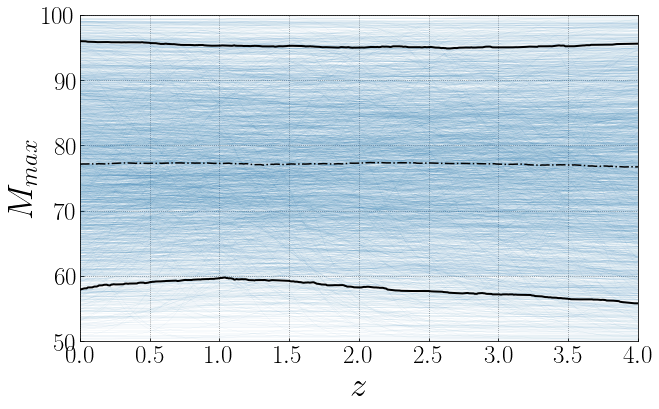

In [14]:
zs = np.linspace(0,4,500)
fig,ax = plt.subplots(figsize=(10,6))
mergerrate_matrix = np.zeros((len(range(stacked_samples_no_GWB.alpha_ref.size)), len(zs)))
for i in range(samps_no_gwb.mMax.size):
    alpha_r = sigmoid_no_delta(samps_no_gwb.mMax.values[i],
                               samps_no_gwb.high_mMax.values[i],
                               10.**samps_no_gwb.log_width_mMax.values[i],
                               samps_no_gwb.middle_z_mMax.values[i],
                               zs,
                              )
    plt.plot(zs, alpha_r, lw = 0.15, color='#1f78b4', alpha = 0.2)
    mergerrate_matrix[i, :] = alpha_r

mean_merger = np.median(mergerrate_matrix, axis = 0)
plt.xlim(0,4)
plt.ylim(50, 100)
ax.set_xlabel(r"$z$", fontsize = 35)
ax.set_ylabel(r"$M_{max}$", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(zs, mean_merger, "-.", c="k", rasterized=True)
plt.plot(zs,np.quantile(mergerrate_matrix,0.05,axis=0), rasterized=True, color='k', lw=2, alpha=1)
plt.plot(zs,np.quantile(mergerrate_matrix,0.95,axis=0), rasterized=True, color='k', lw=2, alpha=1)

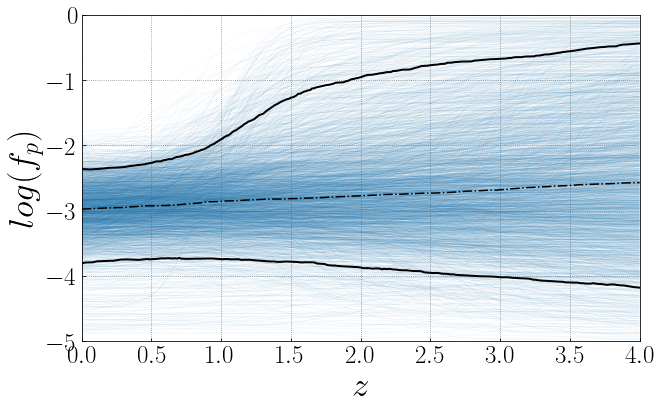

In [15]:
zs = np.linspace(0,4,500)
fig,ax = plt.subplots(figsize=(10,6))
mergerrate_matrix = np.zeros((len(range(stacked_samples_no_GWB.log_f_peak.size)), len(zs)))
for i in range(samps_no_gwb.log_f_peak.size):
    f_peak_r = sigmoid_no_delta(samps_no_gwb.log_f_peak.values[i],
                               samps_no_gwb.log_high_f_peak.values[i],
                               10.**samps_no_gwb.log_width_f_peak.values[i],
                               samps_no_gwb.middle_z_f_peak.values[i],
                               zs,
                              )
    plt.plot(zs, f_peak_r, lw = 0.15, color='#1f78b4', alpha = 0.2)
    mergerrate_matrix[i, :] = f_peak_r

mean_merger = np.median(mergerrate_matrix, axis = 0)
plt.xlim(0,4)
plt.ylim(-5, 0)
ax.set_xlabel(r"$z$", fontsize = 35)
ax.set_ylabel(r"$log(f_p)$", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(zs, mean_merger, "-.", c="k", rasterized=True)
plt.plot(zs,np.quantile(mergerrate_matrix,0.05,axis=0), rasterized=True, color='k', lw=2, alpha=1)
plt.plot(zs,np.quantile(mergerrate_matrix,0.95,axis=0), rasterized=True, color='k', lw=2, alpha=1)

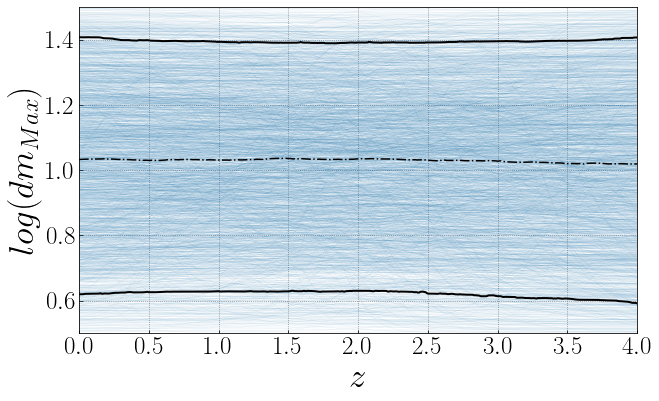

In [16]:
zs = np.linspace(0,4,500)
fig,ax = plt.subplots(figsize=(10,6))
mergerrate_matrix = np.zeros((len(range(stacked_samples_no_GWB.log_f_peak.size)), len(zs)))
for i in range(samps_no_gwb.log_dmMax.size):
    f_peak_r = sigmoid_no_delta(samps_no_gwb.log_dmMax.values[i],
                               samps_no_gwb.log_high_dmMax.values[i],
                               10.**samps_no_gwb.log_width_dm.values[i],
                               samps_no_gwb.middle_z_dm.values[i],
                               zs,
                              )
    plt.plot(zs, f_peak_r, lw = 0.15, color='#1f78b4', alpha = 0.2)
    mergerrate_matrix[i, :] = f_peak_r

mean_merger = np.median(mergerrate_matrix, axis = 0)
plt.xlim(0,4)
plt.ylim(0.5, 1.5)
ax.set_xlabel(r"$z$", fontsize = 35)
ax.set_ylabel(r"$log(dm_{Max})$", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(zs, mean_merger, "-.", c="k", rasterized=True)
plt.plot(zs,np.quantile(mergerrate_matrix,0.05,axis=0), rasterized=True, color='k', lw=2, alpha=1)
plt.plot(zs,np.quantile(mergerrate_matrix,0.95,axis=0), rasterized=True, color='k', lw=2, alpha=1)

In [17]:
def massModel_variation_all_m1(m1, alpha_ref, delta_alpha, width_alpha, middle_alpha,
                               mu_m1, sig_m1, log_f_peak, log_high_f_peak, width_f_peak, middle_f_peak,
                               mMax, high_mMax, width_mMax, middle_mMax,
                               mMin, dmMax, high_dmMax, width_dm, middle_dm, dmMin, zs):
    
    alpha_new = sigmoid(alpha_ref, delta_alpha, width_alpha, middle_alpha, zs)
    p_m1_pl = (1.+alpha_new)*m1**(alpha_new)/(tmp_max**(1.+alpha_new) - tmp_min**(1.+alpha_new))

    p_m1_peak = jnp.exp(-(m1-mu_m1)**2/(2.*sig_m1**2))/jnp.sqrt(2.*np.pi*sig_m1**2)
    
    new_mMax = sigmoid_no_delta(mMax, high_mMax, width_mMax, middle_mMax, zs)
    new_dmMax = sigmoid_no_delta(dmMax, high_dmMax, width_dm, middle_dm, zs)

    # Compute low- and high-mass filters
    low_filter = jnp.exp(-(m1-mMin)**2/(2.*dmMin**2))
    low_filter = jnp.where(m1<mMin,low_filter,1.)
    high_filter = jnp.exp(-(m1-new_mMax)**2/(2.*new_dmMax**2))
    high_filter = jnp.where(m1>new_mMax,high_filter,1.)

    new_f_peak = sigmoid_no_delta(log_f_peak, log_high_f_peak, width_f_peak, middle_f_peak, zs)
    actual_f_peak = 10.**(new_f_peak)
    combined_p = jnp.array((actual_f_peak*p_m1_peak + (1. - actual_f_peak)*p_m1_pl)*low_filter*high_filter)
    return combined_p

In [18]:
def merger_rate_z(z, alpha, beta, zp):
    return (1+z)**alpha/(1+((1+z)/(1+zp))**(alpha+beta))

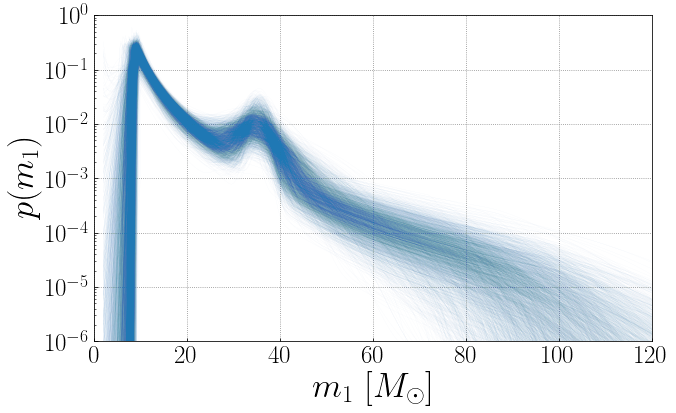

In [19]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)

for i in range(samps.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], 0.2)
    p_m /= np.trapz(p_m,m_grid)
    ax.plot(m_grid,p_m,color='#1f78b4',lw=0.1,alpha=0.1, rasterized = True)
    
ax.set_yscale('log')
ax.set_xlim(0,120)
ax.set_ylim(1e-6,1)
ax.set_xlabel(r"$m_1$ [$M_{\odot}$]", fontsize = 35)
ax.set_ylabel(r"$p(m_1)$", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("p(m)_z_0.2_GWBadded.png", dpi=200, bbox_inches='tight')

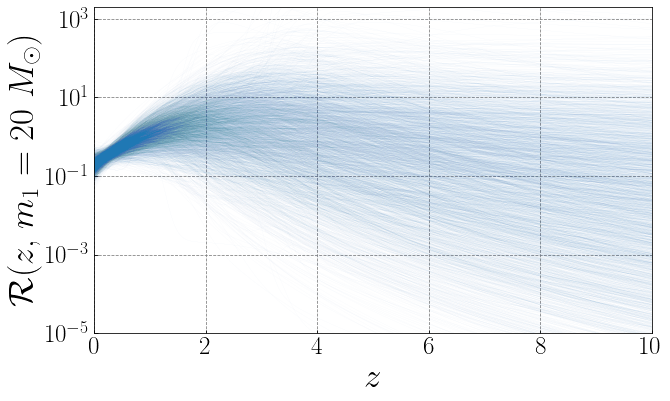

In [22]:
fig,ax = plt.subplots(figsize=(10,6))
z_grid = np.linspace(0,10,500)
for i in range(stacked_samples_no_GWB.alpha_ref.size):
    p_z = massModel_variation_all_m1(20, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], z_grid)
    p_z *= merger_rate_z(z_grid, stacked_samples_no_GWB.alpha_z.values[i], stacked_samples_no_GWB.beta_z.values[i], stacked_samples_no_GWB.zp.values[i])
    p_z /= merger_rate_z(0.2, stacked_samples_no_GWB.alpha_z.values[i], stacked_samples_no_GWB.beta_z.values[i], stacked_samples_no_GWB.zp.values[i])
    p_20 = massModel_variation_all_m1(20, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], 0.2)
    p_z *= stacked_samples_no_GWB.R20.values[i]/p_20 # overall factor of evolving R
    ax.plot(z_grid,p_z,color='#1f78b4',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(1e-5,2e3)
ax.set_xlim(0,10)
ax.set_xlabel(r"$z$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($z$, $m_1$ = 20 $M_{\odot}$)", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(visible=True, which='major', axis='both',linestyle='--')
plt.grid(visible=True, which='minor', axis='both',linewidth=0.5) 
plt.show()

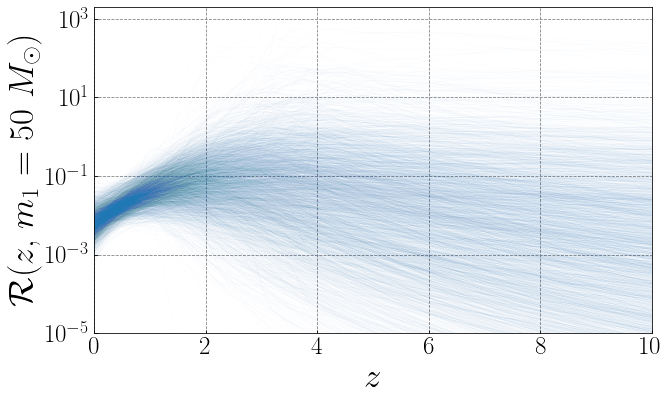

In [23]:
fig,ax = plt.subplots(figsize=(10,6))
z_grid = np.linspace(0,10,500)
M = 50
for i in range(samps_no_gwb.alpha_ref.size):
    p_z = massModel_variation_all_m1(M, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], z_grid)
    p_z *= merger_rate_z(z_grid, samps_no_gwb.alpha_z.values[i], samps_no_gwb.beta_z.values[i], samps_no_gwb.zp.values[i])
    p_z /= merger_rate_z(0.2, samps_no_gwb.alpha_z.values[i], samps_no_gwb.beta_z.values[i], samps_no_gwb.zp.values[i])
    p_20 = massModel_variation_all_m1(20, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], 0.2)
    p_z *= samps_no_gwb.R20.values[i]/p_20 # overall factor of evolving R
    ax.plot(z_grid,p_z,color='#1f78b4',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(1e-5,2e3)
ax.set_xlim(0,10)
ax.set_xlabel(r"$z$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($z$, $m_1$ = 50 $M_{\odot}$)", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(visible=True, which='major', axis='both',linestyle='--')
plt.grid(visible=True, which='minor', axis='both',linewidth=0.5) 
plt.show()

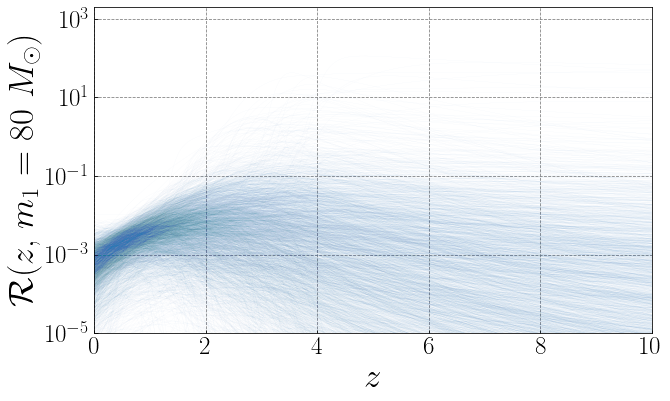

In [24]:
fig,ax = plt.subplots(figsize=(10,6))
z_grid = np.linspace(0,10,500)
M = 80
for i in range(samps_no_gwb.alpha_ref.size):
    p_z = massModel_variation_all_m1(M, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], z_grid)
    p_z *= merger_rate_z(z_grid, samps_no_gwb.alpha_z.values[i], samps_no_gwb.beta_z.values[i], samps_no_gwb.zp.values[i])
    p_z /= merger_rate_z(0.2, samps_no_gwb.alpha_z.values[i], samps_no_gwb.beta_z.values[i], samps_no_gwb.zp.values[i])
    p_20 = massModel_variation_all_m1(20, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], 0.2)
    p_z *= samps_no_gwb.R20.values[i]/p_20 # overall factor of evolving R
    ax.plot(z_grid,p_z,color='#1f78b4',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(1e-5,2e3)
ax.set_xlim(0,10)
ax.set_xlabel(r"$z$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($z$, $m_1$ = 80 $M_{\odot}$)", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(visible=True, which='major', axis='both',linestyle='--')
plt.grid(visible=True, which='minor', axis='both',linewidth=0.5) 
plt.show()

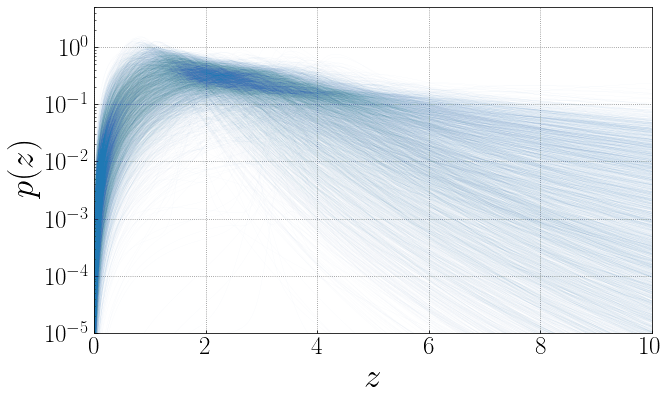

In [25]:
fig,ax = plt.subplots(figsize=(10,6))
z_grid = np.linspace(0,10,500)
for i in range(stacked_samples_no_GWB.alpha_ref.size):
    p_z = massModel_variation_all_m1(20, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], z_grid)
    p_z *= merger_rate_z(z_grid, stacked_samples_no_GWB.alpha_z.values[i], stacked_samples_no_GWB.beta_z.values[i], stacked_samples_no_GWB.zp.values[i])
    # see code in MM
    p_z *= 1/(1+z_grid) # Factor to go from source frame to detector frame
    p_z *= 4.*np.pi*Planck15.differential_comoving_volume(z_grid).to(u.Gpc**3/u.sr).value # to go from per Volume to per z
    p_z /= np.trapz(p_z,z_grid) 
    ax.plot(z_grid,p_z,color='#1f78b4',lw=0.1,alpha=0.1, rasterized = True)

    ax.set_yscale('log')
ax.set_xlim(0,10)
ax.set_ylim(1e-5,5)
ax.set_xlabel(r"$z$", fontsize=35)
ax.set_ylabel(r"$p(z)$", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("p(z)_m_20_GWBadded_and_noGWB.png", dpi=200, bbox_inches='tight')
plt.show()

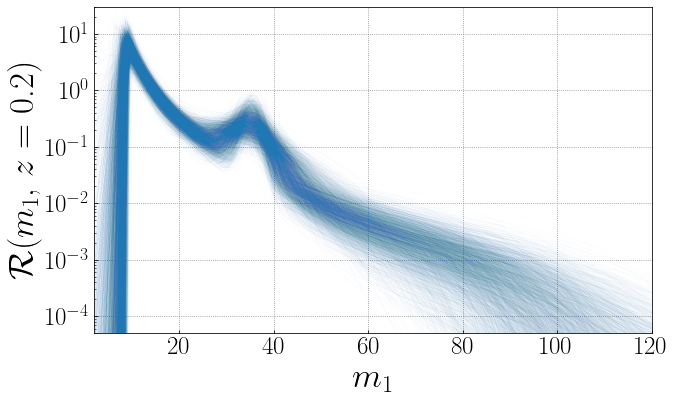

In [26]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 0.2
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], z)
    p_20 = massModel_variation_all_m1(20, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], 0.2)
    p_m *= samps_no_gwb.R20.values[i]/p_20
    ax.plot(m_grid,p_m,color='#1f78b4',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(5e-5,30)
ax.set_xlim(2,120)
ax.set_xlabel(r"$m_1$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($m_1$, $z$ = " + f"{z})", fontsize=35) 
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("R(m)_Z_02.png", dpi=500, bbox_inches='tight')
plt.show()

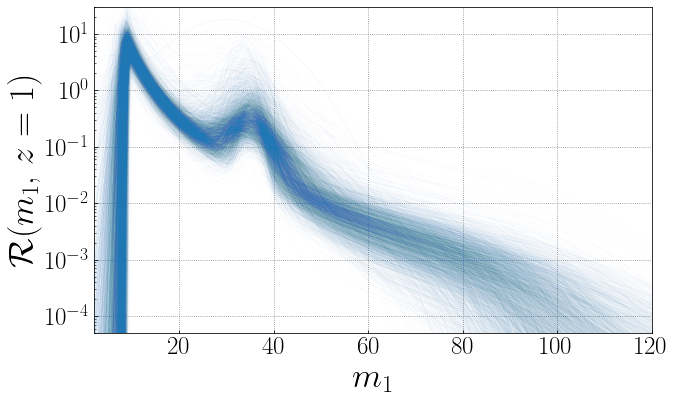

In [27]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 1
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], z)
    p_20 = massModel_variation_all_m1(20, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], 0.2)
    p_m *= samps_no_gwb.R20.values[i]/p_20
    ax.plot(m_grid,p_m,color='#1f78b4',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(5e-5,30)
ax.set_xlim(2,120)
ax.set_xlabel(r"$m_1$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($m_1$, $z$ = " + f"{z})", fontsize=35) 
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("R(m)_Z_02.png", dpi=500, bbox_inches='tight')
plt.show()

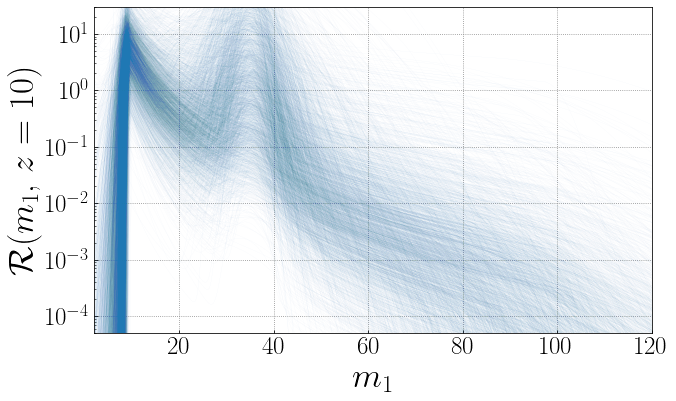

In [28]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 10
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], z)
    p_20 = massModel_variation_all_m1(20, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], 0.2)
    p_m *= samps_no_gwb.R20.values[i]/p_20
    ax.plot(m_grid,p_m,color='#1f78b4',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(5e-5,30)
ax.set_xlim(2,120)
ax.set_xlabel(r"$m_1$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($m_1$, $z$ = " + f"{z})", fontsize=35) 
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("R(m)_Z_02.png", dpi=500, bbox_inches='tight')
plt.show()

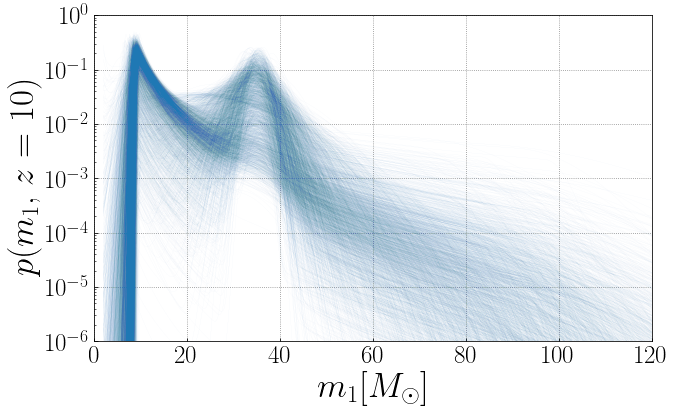

In [36]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 10
#How to get m1 information?
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], z)
    p_m /= np.trapz(p_m,m_grid)    
    ax.plot(m_grid,p_m,color='#1f78b4',lw=0.1,alpha=0.1, rasterized = True)
    
ax.set_yscale('log')
ax.set_ylim(1e-6,1)
ax.set_xlim(0,120)
ax.set_xlabel(r"$m_1 [M_{\odot}]$", fontsize=35)
ax.set_ylabel(r"$p$($m_1$, $z$ = " + f"{z})", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

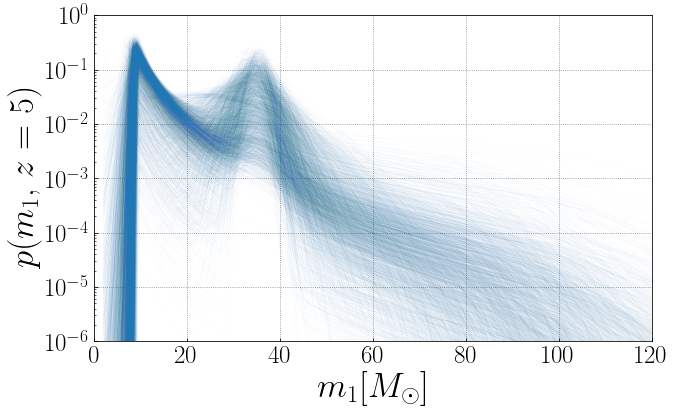

In [37]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 5
#How to get m1 information?
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], z)
    p_m /= np.trapz(p_m,m_grid)    
    ax.plot(m_grid,p_m,color='#1f78b4',lw=0.1,alpha=0.1, rasterized = True)
    
ax.set_yscale('log')
ax.set_ylim(1e-6,1)
ax.set_xlim(0,120)
ax.set_xlabel(r"$m_1 [M_{\odot}]$", fontsize=35)
ax.set_ylabel(r"$p$($m_1$, $z$ = " + f"{z})", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

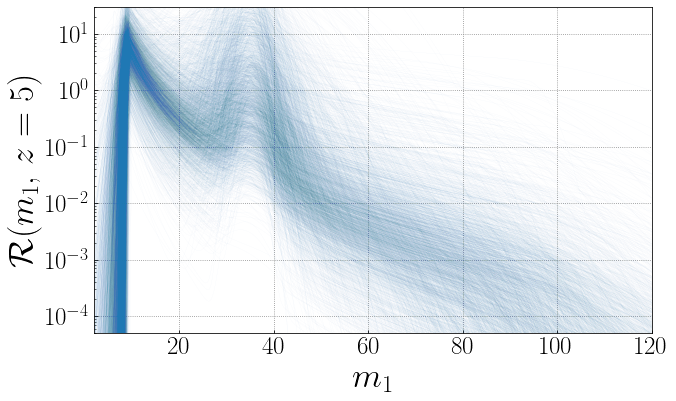

In [31]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 5
for i in range(samps.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], z)
    p_20 = massModel_variation_all_m1(20, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], 0.2)
    p_m *= samps_no_gwb.R20.values[i]/p_20
    ax.plot(m_grid,p_m,color='#1f78b4',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(5e-5,30)
ax.set_xlim(2,120)
ax.set_xlabel(r"$m_1$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($m_1$, $z$ = " + f"{z})", fontsize=35) 
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("R(m)_Z_02.png", dpi=500, bbox_inches='tight')
plt.show()

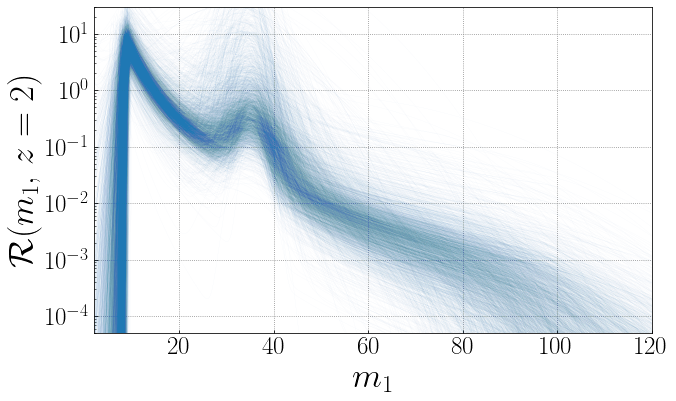

In [32]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 2
for i in range(samps.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], z)
    p_20 = massModel_variation_all_m1(20, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], 0.2)
    p_m *= samps_no_gwb.R20.values[i]/p_20
    ax.plot(m_grid,p_m,color='#1f78b4',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(5e-5,30)
ax.set_xlim(2,120)
ax.set_xlabel(r"$m_1$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($m_1$, $z$ = " + f"{z})", fontsize=35) 
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("R(m)_Z_02.png", dpi=500, bbox_inches='tight')
plt.show()

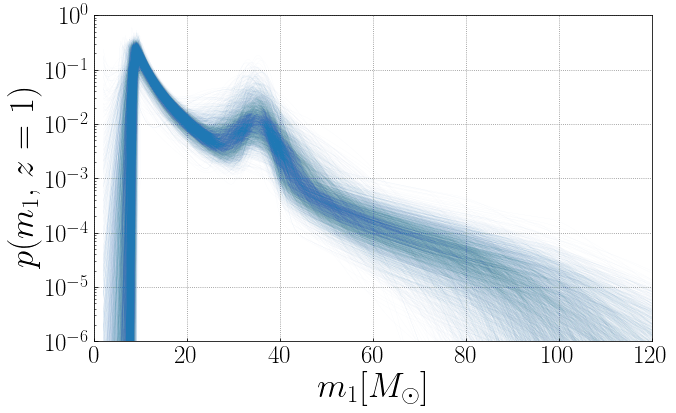

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 1
#How to get m1 information?
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], z)
    p_m /= np.trapz(p_m,m_grid)    
    ax.plot(m_grid,p_m,color='#1f78b4',lw=0.1,alpha=0.1, rasterized = True)
    
ax.set_yscale('log')
ax.set_ylim(1e-6,1)
ax.set_xlim(0,120)
ax.set_xlabel(r"$m_1 [M_{\odot}]$", fontsize=35)
ax.set_ylabel(r"$p$($m_1$, $z$ = " + f"{z})", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

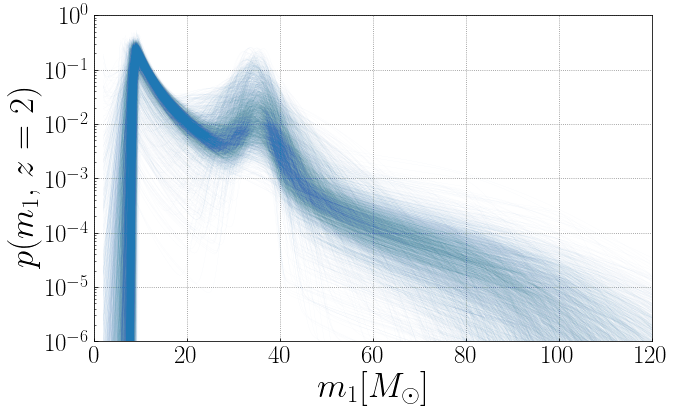

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
z = 2
#How to get m1 information?
for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_variation_all_m1(m_grid, samps_no_gwb.alpha_ref.values[i], samps_no_gwb.delta_alpha.values[i],
                                     samps_no_gwb.width_alpha.values[i], samps_no_gwb.middle_z_alpha.values[i],
                                     samps_no_gwb.mu_m1.values[i], samps_no_gwb.sig_m1.values[i], samps_no_gwb.log_f_peak.values[i],
                                     samps_no_gwb.log_high_f_peak.values[i], samps_no_gwb.width_f_peak.values[i], samps_no_gwb.middle_z_f_peak.values[i],
                                     samps_no_gwb.mMax.values[i], samps_no_gwb.high_mMax.values[i], samps_no_gwb.width_mMax.values[i], samps_no_gwb.middle_z_mMax.values[i],
                                     samps_no_gwb.mMin.values[i], 10.**samps_no_gwb.log_dmMax.values[i], 10.**samps_no_gwb.log_high_dmMax.values[i],
                                     samps_no_gwb.width_dm.values[i], samps_no_gwb.middle_z_dm.values[i], 10.**samps_no_gwb.log_dmMin.values[i], z)
    p_m /= np.trapz(p_m,m_grid)    
    ax.plot(m_grid,p_m,color='#1f78b4',lw=0.1,alpha=0.1, rasterized = True)
    
ax.set_yscale('log')
ax.set_ylim(1e-6,1)
ax.set_xlim(0,120)
ax.set_xlabel(r"$m_1 [M_{\odot}]$", fontsize=35)
ax.set_ylabel(r"$p$($m_1$, $z$ = " + f"{z})", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()